In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# tf
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import initializers

# datetime for manipulating date and time
import datetime

# scipy
import scipy.stats as stats
from scipy.optimize import curve_fit

random.seed(2)

## Data Preprocessing

In [2]:
# Load data
df_realtor_zip_monthly_historical = pd.read_csv("../Data/realtor_zip_monthly_historical.csv")
df_realtor_zip_monthly_current = pd.read_csv("../Data/realtor_zip_monthly_current.csv")
df_realtor_zip_monthly_current.head()

/var/folders/jr/dnsfm9kj2575clb1_33r_09w0000gn/T/ipykernel_36984/2696334772.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_realtor_zip_monthly_historical = pd.read_csv("../Data/realtor_zip_monthly_historical.csv")
/var/folders/jr/dnsfm9kj2575clb1_33r_09w0000gn/T/ipykernel_36984/2696334772.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_realtor_zip_monthly_current = pd.read_csv("../Data/realtor_zip_monthly_current.csv")


,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202408,55033,"hastings, mn",439900.0,-0.0601,-0.0971,50.0,0.2195,0.4925,32.0,...,529676.0,-0.1118,0.0571,108.0,0.1077,0.3252,1.12,-0.2580,-0.3278,0.0
1,202408,98936,"moxee, wa",435000.0,0.0182,0.1918,2.0,-0.5000,-0.5556,26.0,...,442250.0,0.0595,0.0681,7.0,-0.3333,-0.0667,2.00,0.2500,1.3333,1.0
2,202408,61030,"forreston, il",197450.0,0.1967,1.0514,4.0,0.3333,1.6667,29.0,...,208450.0,0.3196,1.1657,7.0,0.7500,1.3333,1.00,0.3333,0.3333,1.0
3,202408,50244,"slater, ia",328500.0,-0.1511,-0.1987,1.0,-0.6667,-0.7500,87.0,...,327725.0,-0.1177,-0.2319,9.0,-0.1429,0.8000,7.00,4.6667,6.7500,1.0
4,202408,27544,"kittrell, nc",374900.0,0.0443,0.2528,3.0,-0.1429,-0.2500,54.0,...,377967.0,0.0000,-0.3887,6.0,-0.2500,0.5000,1.00,-0.2857,0.7500,1.0


In [4]:
#basic eda
historicalshape = np.shape(df_realtor_zip_monthly_historical)
currentshape = np.shape(df_realtor_zip_monthly_current)
print('shape of historical data:',historicalshape)
print('shape of current month data:',currentshape)

#basic stats
df_realtor_zip_monthly_current.describe()

shape of historical data: (2853387, 40)
shape of current month data: (29037, 40)


,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
count,2.900100e+04,28084.000000,26980.000000,29036.000000,27928.000000,26652.000000,28875.000000,27931.000000,26793.000000,29036.000000,...,2.900100e+04,28084.000000,26980.000000,29036.000000,28433.000000,27331.000000,25000.000000,23357.000000,22335.000000,29036.000000
mean,4.753979e+05,72.098040,32.805653,31.240805,0.074803,0.458292,62.659359,0.292983,0.812221,12.588855,...,5.761015e+05,75.047416,32.826471,45.992492,0.057455,0.352617,0.685527,-0.034910,-0.172250,0.571187
std,5.990980e+05,5727.460109,4197.006515,58.466323,0.382677,0.964840,44.984147,1.370220,6.020667,20.360660,...,7.905209e+05,5748.797422,4197.006368,79.479557,0.338685,0.919111,0.653716,0.533831,0.779936,0.494915
min,1.000000e+00,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,-0.997100,-0.995600,0.000000,...,1.000000e+00,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-7.250000,-14.000000,0.000000
25%,2.305000e+05,-0.055700,-0.117700,3.000000,-0.055600,0.000000,36.000000,-0.084000,-0.209500,0.000000,...,2.583900e+05,-0.055900,-0.128100,4.000000,-0.061700,-0.051350,0.297300,-0.161400,-0.408050,0.000000
50%,3.520000e+05,-0.002700,0.014300,10.000000,0.000000,0.272700,52.000000,0.135500,0.134600,4.000000,...,4.029580e+05,-0.005700,0.016200,14.000000,0.000000,0.176500,0.500000,-0.018300,-0.134200,1.000000
75%,5.400000e+05,0.034500,0.190825,35.000000,0.153800,0.741675,75.000000,0.379700,0.583300,16.000000,...,6.314310e+05,0.037400,0.210300,56.000000,0.111100,0.517400,0.938950,0.080400,0.064100,1.000000
max,2.499500e+07,724999.500000,649999.000000,1646.000000,8.000000,24.000000,365.000000,63.750000,353.500000,272.000000,...,2.521667e+07,724999.500000,649999.000000,1788.000000,8.000000,61.000000,14.000000,8.000000,13.500000,1.000000


In [14]:
# Change data types of columns to correct types
min(df_realtor_zip_monthly_historical['median_days_on_market'])
max(df_realtor_zip_monthly_historical['median_days_on_market'])
#df_realtor_zip_monthly_historical['month_date_yyyymm'] = pd.to_datetime(df_realtor_zip_monthly_historical)

365.0

## Basic graphs

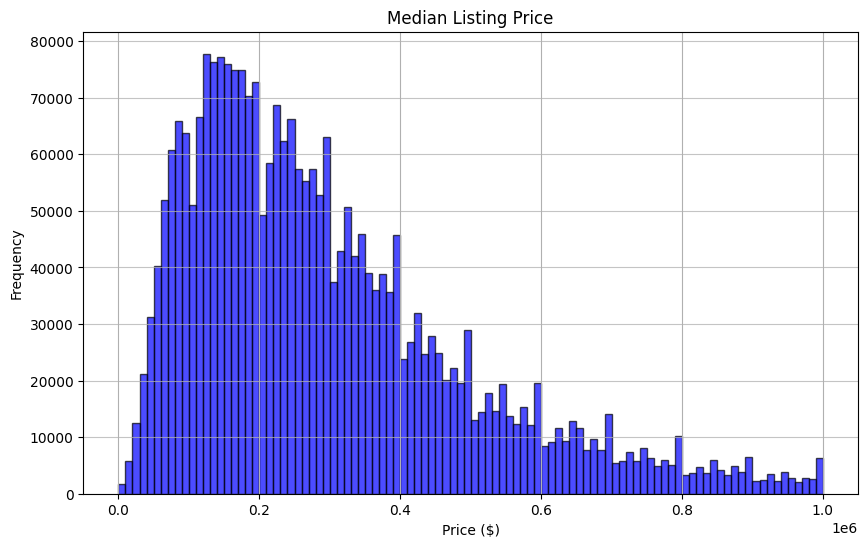

In [13]:
#median listing price
plt.figure(figsize=(10, 6))
df_realtor_zip_monthly_historical['median_listing_price'].hist(bins=100, color='blue', alpha=0.7, edgecolor='black', range=(0, 1000000))
plt.title('Median Listing Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

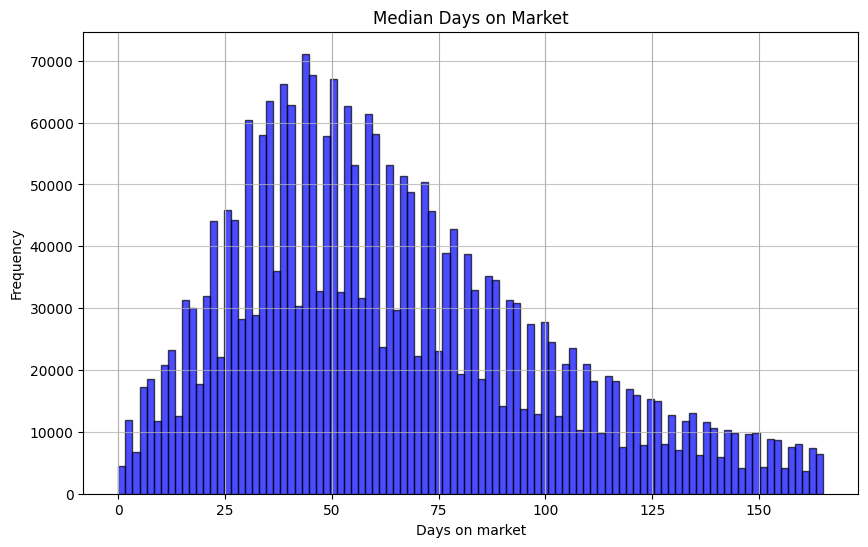

In [16]:
#median days on market
plt.figure(figsize=(10, 6))
df_realtor_zip_monthly_historical['median_days_on_market'].hist(bins=100, color='blue', alpha=0.7, edgecolor='black', range=(0, 165))
plt.title('Median Days on Market')
plt.xlabel('Days on market')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

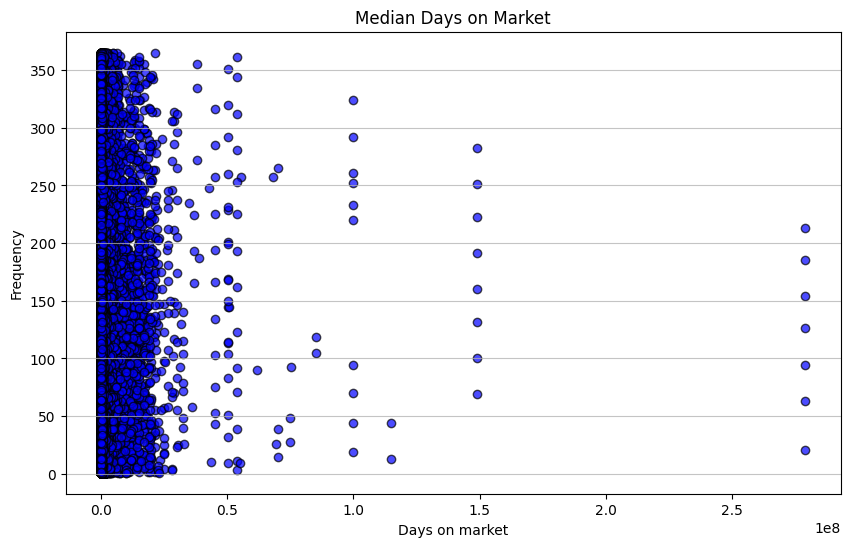

In [18]:
#days on market vs listing price
plt.figure(figsize=(10, 6))
plt.scatter(df_realtor_zip_monthly_historical['median_listing_price'], df_realtor_zip_monthly_historical['median_days_on_market'], color='blue', alpha=0.7, edgecolor='black')
plt.title('Median Days on Market')
plt.xlabel('Median Listing Price')
plt.ylabel('Days on the market')
plt.grid(axis='y', alpha=0.75)
plt.show()